**–°–∫–∞—á–∏–≤–∞–µ–º –∏ –ø–æ–¥–≥–æ—Ç–∞–≤–ª–∏–≤–∞–µ–º –¥–∞–Ω–Ω—ã–µ**

In [ ]:
# —Å–∫–∞—á–∏–≤–∞–µ–º –∏ —Ä–∞—Å–ø–∞–∫–æ–≤—ã–≤–∞–µ–º –¥–∞–Ω–Ω—ã–µ
!kaggle datasets download rmisra/news-headlines-dataset-for-sarcasm-detection

import zipfile

with zipfile.ZipFile('news-headlines-dataset-for-sarcasm-detection.zip', 'r') as zip_ref:
    zip_ref.extractall()

Dataset URL: https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection
License(s): Attribution 4.0 International (CC BY 4.0)
 91% 3.00M/3.30M [00:00<00:00, 5.47MB/s]
100% 3.30M/3.30M [00:00<00:00, 5.05MB/s]


In [ ]:
# —É—Å—Ç–∞–Ω–æ–≤–∏–º –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –ø–∞–∫–µ—Ç—ã

!pip install catboost
!pip install datasets
!pip install evaluate
!pip install langdetect
!pip install pymystem3
!pip install sentence_transformers

import re

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
from nltk.corpus import stopwords
from pymystem3 import Mystem
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, f1_score
from catboost import CatBoostClassifier
from transformers import BertTokenizer, BertForSequenceClassification, TrainingArguments, \
                         Trainer, DataCollatorWithPadding
import torch
from datasets import Dataset, DatasetDict
import evaluate
from sentence_transformers import SentenceTransformer
from langdetect import detect

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 98.7/98.7 MB 7.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 485.4/485.4 kB 20.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 6.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 143.5/143.5 kB 13.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 194.8/194.8 kB 16.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 84.0/84.0 kB 3.2 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [ ]:
# –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –¥–∞–Ω–Ω—ã–µ, –∫–æ—Ç–æ—Ä—ã–µ —É –Ω–∞—Å –µ—Å—Ç—å
df = pd.read_json('Sarcasm_Headlines_Dataset_v2.json', lines=True)
df

is_sarcastic                                           headline  \
0                 1  thirtysomething scientists unveil doomsday clo...   
1                 0  dem rep. totally nails why congress is falling...   
2                 0  eat your veggies: 9 deliciously different recipes   
3                 1  inclement weather prevents liar from getting t...   
4                 1  mother comes pretty close to using word 'strea...   
...             ...                                                ...   
28614             1       jews to celebrate rosh hashasha or something   
28615             1  internal affairs investigator disappointed con...   
28616             0  the most beautiful acceptance speech this week...   
28617             1  mars probe destroyed by orbiting spielberg-gat...   
28618             1                 dad clarifies this not a food stop   

                                            article_link  
0      https://www.theonion.com/thirtysomething-scien...  
1      https://www.huffingtonpost.com/entry/donna-edw...  
2      https://www.huffingtonpost.com/entry/eat-your-...  
3      https://local.theonion.com/inclement-weather-p...  
4      https://www.theonion.com/mother-comes-pretty-c...  
...                                                  ...  
28614  https://www.theonion.com/jews-to-celebrate-ros...  
28615  https://local.theonion.com/internal-affairs-in...  
28616  https://www.huffingtonpost.com/entry/andrew-ah...  
28617  https://www.theonion.com/mars-probe-destroyed-...  
28618  https://www.theonion.com/dad-clarifies-this-no...  

[28619 rows x 3 columns]

In [ ]:
# —É–¥–∞–ª–∏–º –∞–¥—Ä–µ—Å —Å—Å—ã–ª–∫–∏, –æ–Ω–∞ –Ω–µ –Ω—É–∂–Ω–∞
df = df.drop('article_link', axis=1)

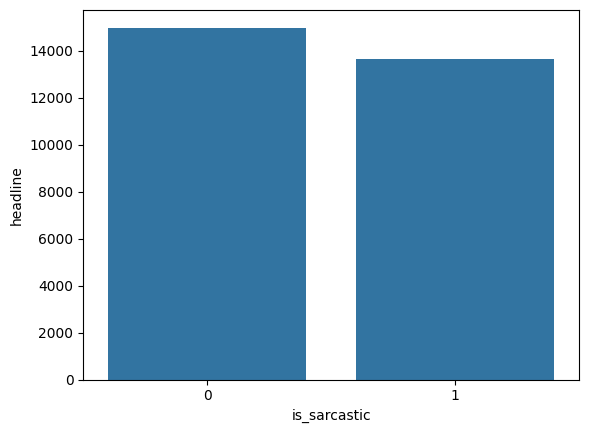

In [ ]:
sns.barplot(df.groupby('is_sarcastic').agg('count')['headline']);

–∫–∞–∫ –≤—ã –º–æ–∂–µ–º —É–≤–∏–¥–µ—Ç—å, –∫–ª–∞—Å—Å—ã –¥–æ–≤–æ–ª—å–Ω–æ —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã

–¥–∞–≤–∞–π—Ç–µ —Ç–µ–ø–µ—Ä—å –ø–æ—á–∏—Å—Ç–∏–º –¥–∞–Ω–Ω—ã–µ –æ—Ç —Å–∏–º–≤–æ–ª–æ–≤ –¥–ª—è TFIDF
–¥–ª—è —è–∑—ã–∫–æ–≤—ã—Ö –º–æ–¥–µ–ª–µ–π –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –≥–æ—Ç–æ–≤—ã–π —Ç–µ–∫—Å—Ç

In [ ]:
df['headline_cleared'] = df['headline'].apply(lambda x: re.sub(r'[^\w\s]|[0-9]', ' ', x))

In [ ]:
df

is_sarcastic                                           headline  \
0                 1  thirtysomething scientists unveil doomsday clo...   
1                 0  dem rep. totally nails why congress is falling...   
2                 0  eat your veggies: 9 deliciously different recipes   
3                 1  inclement weather prevents liar from getting t...   
4                 1  mother comes pretty close to using word 'strea...   
...             ...                                                ...   
28614             1       jews to celebrate rosh hashasha or something   
28615             1  internal affairs investigator disappointed con...   
28616             0  the most beautiful acceptance speech this week...   
28617             1  mars probe destroyed by orbiting spielberg-gat...   
28618             1                 dad clarifies this not a food stop   

                                        headline_cleared  
0      thirtysomething scientists unveil doomsday clo...  
1      dem rep  totally nails why congress is falling...  
2      eat your veggies    deliciously different recipes  
3      inclement weather prevents liar from getting t...  
4      mother comes pretty close to using word  strea...  
...                                                  ...  
28614       jews to celebrate rosh hashasha or something  
28615  internal affairs investigator disappointed con...  
28616  the most beautiful acceptance speech this week...  
28617  mars probe destroyed by orbiting spielberg gat...  
28618                 dad clarifies this not a food stop  

[28619 rows x 3 columns]

–¥–∞–≤–∞–π—Ç–µ —Ç–µ–ø–µ—Ä—å –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —è–∑—ã–∫ —Ç–µ–∫—Å—Ç–∞

In [ ]:
df[df.headline.str.contains('“Ø')]
df['lang'] = df.headline_cleared.apply(detect)

In [ ]:
df.groupby('lang').agg('count')['headline_cleared']

lang
af      155
ca      109
cs        3
cy       24
da      141
de       13
en    27295
es       63
et       32
fi        7
fr      188
hr        9
hu        2
id       29
it      141
lt        4
lv        9
nl      103
no      108
pl        6
pt       25
ro       46
sk        9
sl        9
so       13
sq        5
sv       41
sw        1
tl       27
tr        2
Name: headline_cleared, dtype: int64

In [ ]:
# —É–¥–∞–ª–∏–º –∫–æ–ª–æ–Ω–∫—É "lang"
df = df.drop('lang', axis=1)

—è–∑—ã–∫–∏ —Ä–∞–∑–Ω—ã–µ –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—Ç, –Ω–æ –ø–æ–¥–∞–≤–ª—è—é—â–µ–µ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤ –Ω–∞ –∞–Ω–≥–ª–∏–π—Å–∫–æ–º, –≤ –ª—é–±–æ–º —Å–ª—É—á–∞–µ –æ—Å—Ç–∞–≤–∏–º –≤—Å–µ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–∏

–¥–∞–Ω–Ω—ã–µ –≥–æ—Ç–æ–≤—ã, —Ç–µ–ø–µ—Ä—å –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —Å–¥–µ–ª–∞—Ç—å —Ä–∞–∑–±–∏–µ–Ω–∏—è –Ω–∞ train, test, valid

In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['is_sarcastic'])
train, valid = train_test_split(train, test_size=0.2, random_state=42, stratify=train['is_sarcastic'])

–î–∞–≤–∞–π—Ç–µ —Ç–µ–ø–µ—Ä—å –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –º–æ–¥–µ–ª–∏ –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è

- TF-IDF + CatBoost/LogisticRegression
- sentence-transformer + Catboost
- TinyBert
- Hugging Face BERT

**1. TF-IDF + CatBoost**

–î–∞–≤–∞–π—Ç–µ —Å–Ω–∞—á–∞–ª–∞ —É–¥–∞–ª–∏–º —Å—Ç–æ–ø —Å–ª–æ–≤–∞, –∞ —Ç–∞–∫–∂–µ –ª–µ–º–º–∞—Ç–∏–∑–∏—Ä—É–µ–º –Ω–∞—à —Ç–µ–∫—Å—Ç

In [ ]:
nltk.download("stopwords")
mystem = Mystem()
russian_stopwords = stopwords.words("russian")

def lemm_preprocess(text):

  tokens = mystem.lemmatize(text.lower())
  tokens = [token for token in tokens if token not in russian_stopwords and token != " " and len(token) > 1]
  text = " ".join(tokens).strip(' \n')

  return text

train['lemm'] = train['headline_cleared'].apply(lemm_preprocess)
test['lemm'] = test['headline_cleared'].apply(lemm_preprocess)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [ ]:
X_train = train['lemm']
y_train = train['is_sarcastic']
X_test = test['lemm']
y_test = test['is_sarcastic']

–∞ —Ç–µ–ø–µ—Ä—å –≤–µ–∫—Ç–æ—Ä–∏–∑—É–µ–º

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

–≤–æ–∑—å–º–µ–º –º–æ–¥–µ–ª—å CatBoost, –æ–±—É—á–∏–º –Ω–∞ Train –∏ —Å–¥–µ–ª–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –Ω–∞ Test

In [ ]:
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6)
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)


# –û—Ü–µ–Ω–∫–∞ –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏
f1 = f1_score(y_test, y_pred, average='binary')
print(f"f1_score: {f1}")

0:	learn: 0.6678647	total: 412ms	remaining: 6m 51s
1:	learn: 0.6497758	total: 582ms	remaining: 4m 50s
2:	learn: 0.6339008	total: 779ms	remaining: 4m 18s
3:	learn: 0.6212043	total: 947ms	remaining: 3m 55s
4:	learn: 0.6114541	total: 1.12s	remaining: 3m 43s
5:	learn: 0.6009109	total: 1.28s	remaining: 3m 32s
6:	learn: 0.5931551	total: 1.46s	remaining: 3m 26s
7:	learn: 0.5858214	total: 1.63s	remaining: 3m 21s
8:	learn: 0.5800863	total: 1.81s	remaining: 3m 19s
9:	learn: 0.5744804	total: 1.97s	remaining: 3m 15s
10:	learn: 0.5707401	total: 2.14s	remaining: 3m 12s
11:	learn: 0.5664355	total: 2.3s	remaining: 3m 9s
12:	learn: 0.5635204	total: 2.47s	remaining: 3m 7s
13:	learn: 0.5597407	total: 2.63s	remaining: 3m 5s
14:	learn: 0.5565532	total: 2.81s	remaining: 3m 4s
15:	learn: 0.5538184	total: 2.98s	remaining: 3m 3s
16:	learn: 0.5514382	total: 3.15s	remaining: 3m 1s
17:	learn: 0.5492000	total: 3.31s	remaining: 3m
18:	learn: 0.5468865	total: 3.47s	remaining: 2m 59s
19:	learn: 0.5442912	total: 3.64s

–≤–æ–∑—å–º–µ–º –º–æ–¥–µ–ª—å LogisticRegression, –æ–±—É—á–∏–º –Ω–∞ Train –∏ —Å–¥–µ–ª–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –Ω–∞ Test

In [ ]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)


# –û—Ü–µ–Ω–∫–∞ –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏
f1 = f1_score(y_test, y_pred, average='binary')
print(f"f1_score: {f1}")

f1_score: 0.8312816799420709


–ø–æ–ª—É—á–∏–ª–∏ –Ω–µ–ø–ª–æ—Ö–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –ø–æ CatBoost f1 = 0.82, –∞ –ø–æ LogisticRegression f1 = 0.83

**2. sentence-transformer + Catboost**

In [ ]:
X_train = train['headline']
y_train = train['is_sarcastic']
X_test = test['headline']
y_test = test['is_sarcastic']

In [ ]:
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')


def preprocess(data, model):
  embed = data.apply(model.encode)
  embed = pd.DataFrame(embed.tolist(), index=data.index)
  return embed

embedded_train = preprocess(X_train, model)
embedded_test = preprocess(X_test, model)
embedded_train.sample(10)

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

0         1         2         3         4         5         6    \
16633  0.204172 -0.122982  0.212576  0.212724 -0.513706 -0.095310  0.706701   
8681  -0.225252 -0.049556  0.224297 -0.160500  0.126138 -0.190302  0.330128   
27153  0.499314  0.220556 -0.030231  0.015806  0.252285 -0.094455  0.312186   
27433  0.416668  0.440590 -0.393501  0.250392  0.286481  0.319899 -0.423046   
23811  0.182766 -0.300165  0.075031 -0.456549 -0.014877  0.042819 -0.110205   
10104 -0.262645  0.166435 -0.103592 -0.026668 -0.059175  0.323288  0.168283   
14564  0.233156  0.117785  0.089254  0.187817  0.170794 -0.131355 -0.637743   
16220 -0.220343  0.019819 -0.087485 -0.435710 -0.140937 -0.230140 -0.311999   
6138  -0.048666  0.278457 -0.100238 -0.168186  0.129127  0.033601 -0.014875   
3666  -0.299689  0.392616 -0.261600 -0.335868 -0.152180  0.074753 -0.448062   

            7         8         9    ...       374       375       376  \
16633  0.268706 -0.247309 -0.022884  ...  0.022254 -0.094363  0.226993   
8681   0.018999  0.022844 -0.231483  ... -0.073124 -0.087816 -0.047685   
27153  0.059371 -0.210165 -0.057277  ...  0.241044 -0.727678  0.150671   
27433 -0.578176  0.672043  0.155796  ... -0.124773 -0.159539  0.314022   
23811 -0.528373  0.368679 -0.056693  ...  0.055947 -0.013302  0.308472   
10104 -0.506315 -0.356802 -0.281853  ...  0.025041 -0.090575  0.178959   
14564 -0.429018 -0.031204 -0.038978  ...  0.076453 -0.001209  0.121129   
16220  0.100151 -0.086294  0.126742  ...  0.264366  0.273830  0.045784   
6138  -0.283014 -0.383984 -0.283159  ... -0.112693 -0.098408 -0.439210   
3666  -0.188965  0.403525  0.101468  ... -0.052547 -0.018071  0.125897   

            377       378       379       380       381       382       383  
16633 -0.004180 -0.524977 -0.038275  0.252573 -0.046894 -0.006034  0.401617  
8681  -0.011426  0.191414 -0.024267 -0.045977 -0.378351  0.086992  0.056885  
27153 -0.040005 -0.316569 -0.199875  0.417357 -0.093627 -0.122604  0.158277  
27433  0.378536 -0.101023  0.223951  0.540533 -0.269978 -0.218578  0.298906  
23811 -0.304028  0.089728  0.230423 -0.421907  0.331365  0.144243  0.065442  
10104  0.227184  0.056806 -0.064805  0.150522 -0.011195  0.130525  0.216034  
14564 -0.012264  0.098296 -0.381149  0.197740  0.258525  0.294309 -0.073534  
16220 -0.027968 -0.302951  0.545700  0.157026 -0.102190  0.199761  0.060394  
6138   0.267232  0.113396  0.050140  0.011317 -0.352381  0.201473  0.132875  
3666   0.126155 -0.172003  0.176162  0.029128 -0.198987 -0.031596  0.003311  

[10 rows x 384 columns]

–≤–æ–∑—å–º–µ–º –º–æ–¥–µ–ª—å CatBoost, –æ–±—É—á–∏–º –Ω–∞ Train –∏ —Å–¥–µ–ª–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –Ω–∞ Test

In [ ]:
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6)
model.fit(embedded_train, y_train)
y_pred = model.predict(embedded_test)


# –û—Ü–µ–Ω–∫–∞ –ø—Ä–æ–∏–∑–≤–æ–¥–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏
f1 = f1_score(y_test, y_pred, average='binary')
print(f"f1_score: {f1}")

0:	learn: 0.6818912	total: 143ms	remaining: 2m 22s
1:	learn: 0.6733840	total: 256ms	remaining: 2m 7s
2:	learn: 0.6665406	total: 367ms	remaining: 2m 1s
3:	learn: 0.6594714	total: 478ms	remaining: 1m 58s
4:	learn: 0.6529526	total: 591ms	remaining: 1m 57s
5:	learn: 0.6472706	total: 708ms	remaining: 1m 57s
6:	learn: 0.6422557	total: 825ms	remaining: 1m 56s
7:	learn: 0.6370814	total: 932ms	remaining: 1m 55s
8:	learn: 0.6318070	total: 1.05s	remaining: 1m 55s
9:	learn: 0.6274715	total: 1.16s	remaining: 1m 54s
10:	learn: 0.6236075	total: 1.27s	remaining: 1m 54s
11:	learn: 0.6197515	total: 1.38s	remaining: 1m 53s
12:	learn: 0.6163207	total: 1.49s	remaining: 1m 53s
13:	learn: 0.6125374	total: 1.6s	remaining: 1m 52s
14:	learn: 0.6093034	total: 1.71s	remaining: 1m 52s
15:	learn: 0.6057568	total: 1.82s	remaining: 1m 52s
16:	learn: 0.6025485	total: 1.94s	remaining: 1m 52s
17:	learn: 0.5995283	total: 2.06s	remaining: 1m 52s
18:	learn: 0.5963408	total: 2.17s	remaining: 1m 52s
19:	learn: 0.5940989	tota

f1=0,78, —á—Ç–æ —Ö—É–∂–µ —á–µ–º –≤ –ø—Ä–µ–¥—ã–¥—É—â–µ–º –º–µ—Ç–æ–¥–µ

–¥–∞–ª–µ–µ –Ω–∞–º –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –ø—Ä–æ–≤–µ—Å—Ç–∏ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—É—é –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫—É –¥–ª—è –±–æ–ª–µ–µ —Å–ª–æ–∂–Ω—ã—Ö (–¥–∞–ª—å–Ω–µ–π—à–∏—Ö) –º–µ—Ç–æ–¥–æ–≤

In [ ]:
df_train = train[['headline', 'is_sarcastic']].rename(columns={'headline': 'text', 'is_sarcastic': 'labels'})
df_valid = valid[['headline', 'is_sarcastic']].rename(columns={'headline': 'text', 'is_sarcastic': 'labels'})
df_test = test[['headline', 'is_sarcastic']].rename(columns={'headline': 'text', 'is_sarcastic': 'labels'})

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º pandas DataFrame –≤ Dataset
train_dataset = Dataset.from_pandas(df_train)
valid_dataset = Dataset.from_pandas(df_valid)
test_dataset = Dataset.from_pandas(df_test)

—Ç–∞–∫–∂–µ –Ω–∞–¥–æ –ø—Ä–æ–ø–∏—Å–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏—é –º–µ—Ç—Ä–∏–∫–∏ f1

In [ ]:
from sklearn.metrics import f1_score, accuracy_score

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è –º–µ—Ç—Ä–∏–∫
def compute_metrics(p):
    predictions, labels = p
    preds = np.argmax(predictions, axis=1)
    f1 = f1_score(labels, preds, average='binary')
    accuracy = accuracy_score(labels, preds)
    return {
        'accuracy': accuracy,
        'f1': f1
    }


**3. TinyBERT**

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments

# –ó–∞–≥—Ä—É–∂–∞–µ–º –º–æ–¥–µ–ª—å
model_name = "huawei-noah/TinyBERT_General_4L_312D"
tokenizer = AutoTokenizer.from_pretrained(model_name, cache_dir="./cache")
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2, cache_dir="./cache")

# –§—É–Ω–∫—Ü–∏—è —Ç–æ–∫–µ–Ω–∏–∑–∞—Ü–∏–∏
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

# –ü—Ä–∏–º–µ–Ω—è–µ–º —Ñ—É–Ω–∫—Ü–∏—é —Ç–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—é –∫ –¥–∞–Ω–Ω—ã–º
train_dataset_tb = train_dataset.map(tokenize_function, batched=True)
valid_dataset_tb = valid_dataset.map(tokenize_function, batched=True)
test_dataset_tb = test_dataset.map(tokenize_function, batched=True)

# –£–±–∏—Ä–∞–µ–º –∫–æ–ª–æ–Ω–∫—É "text"
train_dataset_tb = train_dataset_tb.remove_columns(["text"])
valid_dataset_tb = valid_dataset_tb.remove_columns(["text"])
test_dataset_tb = test_dataset_tb.remove_columns(["text"])

# –£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –æ–±—É—á–µ–Ω–∏—è
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
    push_to_hub=False,
    bf16=True
)

# –°–æ–∑–¥–∞–µ–º —Ç—Ä–µ–Ω–µ—Ä–∞
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_tb,
    eval_dataset=valid_dataset_tb,
    compute_metrics=compute_metrics
)

# –ù–∞—á–∏–Ω–∞–µ–º –æ–±—É—á–µ–Ω–∏–µ
trainer.train()


config.json:   0%|          | 0.00/409 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/62.7M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at huawei-noah/TinyBERT_General_4L_312D and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/18316 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/62.7M [00:00<?, ?B/s]

Map:   0%|          | 0/4579 [00:00<?, ? examples/s]

Map:   0%|          | 0/5724 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: antonsivtsev13 (antonsivtsev13-none) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


TrainOutput(global_step=1719, training_loss=0.33257538693945654, metrics={'train_runtime': 237.2176, 'train_samples_per_second': 231.635, 'train_steps_per_second': 7.247, 'total_flos': 196974791129088.0, 'train_loss': 0.33257538693945654, 'epoch': 3.0})

In [ ]:
# –û—Ü–µ–Ω–∏–≤–∞–º –º–æ–¥–µ–ª—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
results = trainer.evaluate(test_dataset_tb)

print(results)


{'eval_loss': 0.2831237316131592, 'eval_accuracy': 0.8819007686932215, 'eval_f1': 0.8749074759437454, 'eval_runtime': 7.9737, 'eval_samples_per_second': 717.862, 'eval_steps_per_second': 22.449, 'epoch': 3.0}


–ø–æ–ª—É—á–∞–µ–º –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å f1 = 0.88, —á—Ç–æ –Ω–∞–º–Ω–æ–≥–æ –ª—É—á—à–µ —á–µ–º –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ –¥—Ä—É–≥–∏—Ö –º–µ—Ç–æ–¥–æ–≤!

In [ ]:
# –°–æ–∑–¥–∞–¥–∏–º –ø–∞–ø–∫—É –¥–ª—è –º–æ–¥–µ–ª–∏
save_path = "sarcasm_model"
trainer.save_model(save_path)
tokenizer.save_pretrained(save_path)

('sarcasm_model/tokenizer_config.json',
 'sarcasm_model/special_tokens_map.json',
 'sarcasm_model/vocab.txt',
 'sarcasm_model/added_tokens.json',
 'sarcasm_model/tokenizer.json')

In [ ]:
# –°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å –Ω–∞ –∫–æ–º–ø—å—é—Ç–µ—Ä
import shutil
shutil.make_archive("sarcasm_model", "zip", "sarcasm_model")

from google.colab import files
files.download("sarcasm_model.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**4. Hugging Face BERT**

In [ ]:
from transformers import AutoTokenizer

# –∑–∞–≥—Ä—É–∂–∞–µ–º –º–æ–¥–µ–ª—å
MODEL_NAME = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

# –§—É–Ω–∫—Ü–∏—è —Ç–æ–∫–µ–Ω–∏–∑–∞—Ü–∏–∏
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
from transformers import AutoModelForSequenceClassification

num_labels = len(set(df_test["labels"]))
model = AutoModelForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=num_labels)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
train_dataset_hfb = train_dataset.map(tokenize_function, batched=True)
valid_dataset_hfb = valid_dataset.map(tokenize_function, batched=True)
test_dataset_hfb = test_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/18316 [00:00<?, ? examples/s]

Map:   0%|          | 0/4579 [00:00<?, ? examples/s]

Map:   0%|          | 0/5724 [00:00<?, ? examples/s]

In [ ]:
from transformers import TrainingArguments, Trainer
import torch

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_hfb,
    eval_dataset=valid_dataset_hfb,
    compute_metrics=compute_metrics
)

trainer.train()


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: antonsivtsev13 (antonsivtsev13-none) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


TrainOutput(global_step=6870, training_loss=0.18027075957696684, metrics={'train_runtime': 5597.697, 'train_samples_per_second': 9.816, 'train_steps_per_second': 1.227, 'total_flos': 1.445742626992128e+16, 'train_loss': 0.18027075957696684, 'epoch': 3.0})

In [ ]:
# –°–æ–∑–¥–∞–¥–∏–º –ø–∞–ø–∫—É –¥–ª—è –º–æ–¥–µ–ª–∏
save_path = "sarcasm_model_Hugging_Face_BERT"
trainer.save_model(save_path)
tokenizer.save_pretrained(save_path)

('sarcasm_model_Hugging_Face_BERT/tokenizer_config.json',
 'sarcasm_model_Hugging_Face_BERT/special_tokens_map.json',
 'sarcasm_model_Hugging_Face_BERT/vocab.txt',
 'sarcasm_model_Hugging_Face_BERT/added_tokens.json',
 'sarcasm_model_Hugging_Face_BERT/tokenizer.json')

In [ ]:
# –°–æ—Ö—Ä–∞–Ω—è–µ–º –º–æ–¥–µ–ª—å –Ω–∞ –∫–æ–º–ø—å—é—Ç–µ—Ä
import shutil
shutil.make_archive("sarcasm_model_Hugging_Face_BERT", "zip", "sarcasm_model_Hugging_Face_BERT")

from google.colab import files
files.download("sarcasm_model_Hugging_Face_BERT.zip")

**–ª—É—á—à–µ–π –º–æ–¥–µ–ª—å—é —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è - Hugging Face BERT, c f1 = 0.93**